In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
x_0 = tf.random.normal([20], 3, 1 )
x_1 = tf.random.normal([20],5.5,1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

x=tf.concat([x_0,x_1],0)
y=tf.concat([y_0,y_1],0)

print(x.shape)
print(y.shape)
print(x_0.shape)
print(x)
print(y)


(40,)
(40,)
(20,)
tf.Tensor(
[1.8987797 4.5457516 3.383644  2.1203423 1.7753278 2.018879  3.087808
 2.7967396 2.4418437 2.279456  2.3740077 2.284974  2.6516457 2.66353
 3.1825757 4.1085954 4.279659  2.9785242 2.6803112 3.3733256 5.903088
 4.411979  5.4369044 6.8365564 6.21176   5.0107136 4.735779  4.4627514
 4.248066  5.5212245 4.948624  3.7568302 5.164639  4.4573326 6.509138
 6.7362537 4.816311  6.173609  5.079377  4.4586973], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


In [28]:
def plot_graph(X,Y, X_hat=None, Y_hat=None, str_title = None):
  fig = plt.figure(figsize=(8,6))
  if str_title is not None :
    plt.title(str_title, fontsize=20, pad=20)
  
  plt.plot(X,Y, ls='none' , marker ='x')

  if X_hat is not None and Y_hat is not None:
    plt.plot(X_hat, Y_hat)

  plt.tick_params(axis='both', labelsize=14)


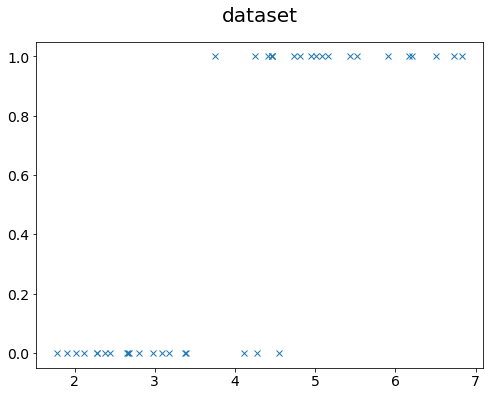

In [29]:
plot_graph(x,y,str_title ='dataset')

In [17]:
W =tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b =tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

def cross_entropy(y_pred, y_true) :
  y_pred = tf.clip_by_value(y_pred, 1e-9,1.)
  return  -tf.reduce_sum(y_true*tf.math.log(y_pred)+(1-y_true)*(tf.math.log(1-y_pred)))


In [18]:
lr = 0.001
optimizer = tf.optimizers.SGD(lr)

def run_optimization():
  with tf.GradientTape() as g:
    pred = 1/(1+tf.exp(-1*(W*x+b)))
    loss = cross_entropy(pred,y)
  
  gradients = g.gradient(loss, [W,b])
  optimizer.apply_gradients(zip(gradients,[W,b]))

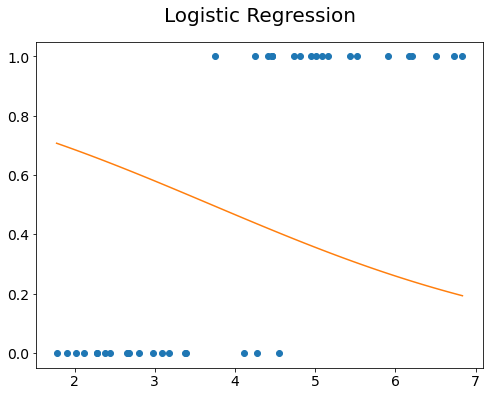

In [20]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )

In [22]:
training_steps = 1000
display_step = 50 
end_step =0
for step in range(1, training_steps+1) :
  run_optimization()

  if step % display_step == 0 : 
    pred = 1/(1+tf.exp(-1*(W*x+b)))
    loss = cross_entropy(pred, y)
    print("step: ", step, ", loss:", loss.numpy())

end_step = step 

step:  50 , loss: 32.560574
step:  100 , loss: 30.682846
step:  150 , loss: 28.981007
step:  200 , loss: 27.442001
step:  250 , loss: 26.05212
step:  300 , loss: 24.797577
step:  350 , loss: 23.66499
step:  400 , loss: 22.641699
step:  450 , loss: 21.715979
step:  500 , loss: 20.87713
step:  550 , loss: 20.11551
step:  600 , loss: 19.422512
step:  650 , loss: 18.790485
step:  700 , loss: 18.212692
step:  750 , loss: 17.683184
step:  800 , loss: 17.196735
step:  850 , loss: 16.748766
step:  900 , loss: 16.335243
step:  950 , loss: 15.95263
step:  1000 , loss: 15.597818


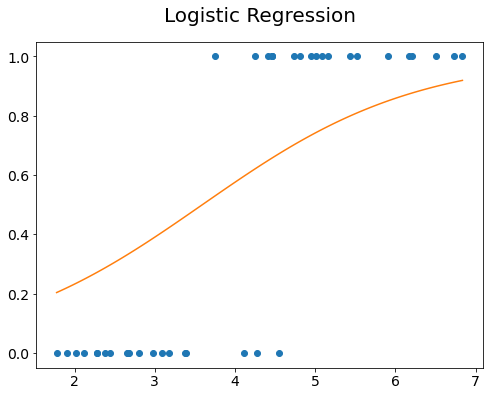

In [23]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )

In [24]:
training_steps = 1000
display_step = 200 
for step in range(end_step + 1 , end_step + training_steps +1 ) :
  run_optimization()

  if step % display_step == 0 : 
    pred = 1/(1+tf.exp(-1*(W*x+b)))
    loss = cross_entropy(pred, y)
    print("step: ", step, ", loss:", loss.numpy())

end_step = step 

step:  1200 , loss: 14.406309
step:  1400 , loss: 13.48944
step:  1600 , loss: 12.764447
step:  1800 , loss: 12.177927
step:  2000 , loss: 11.694215


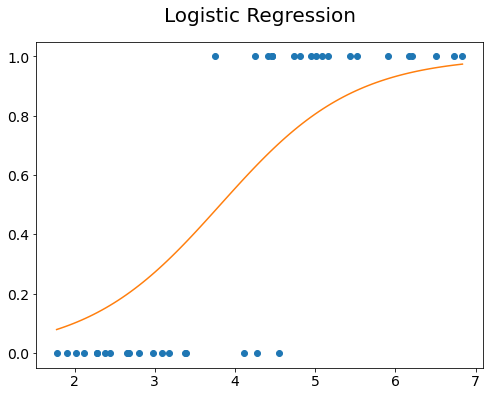

In [25]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )

In [26]:
training_steps = 10000
display_step = 500 
for step in range(end_step + 1 , end_step + training_steps +1 ) :
  run_optimization()

  if step % display_step == 0 : 
    pred = 1/(1+tf.exp(-1*(W*x+b)))
    loss = cross_entropy(pred, y)
    print("step: ", step, ", loss:", loss.numpy())

end_step = step 

step:  2500 , loss: 10.790524
step:  3000 , loss: 10.164068
step:  3500 , loss: 9.704685
step:  4000 , loss: 9.35364
step:  4500 , loss: 9.076826
step:  5000 , loss: 8.853104
step:  5500 , loss: 8.668673
step:  6000 , loss: 8.514135
step:  6500 , loss: 8.382878
step:  7000 , loss: 8.270101
step:  7500 , loss: 8.172242
step:  8000 , loss: 8.086597
step:  8500 , loss: 8.011078
step:  9000 , loss: 7.944046
step:  9500 , loss: 7.8841996
step:  10000 , loss: 7.830486
step:  10500 , loss: 7.7820497
step:  11000 , loss: 7.7381845
step:  11500 , loss: 7.698303
step:  12000 , loss: 7.6619205


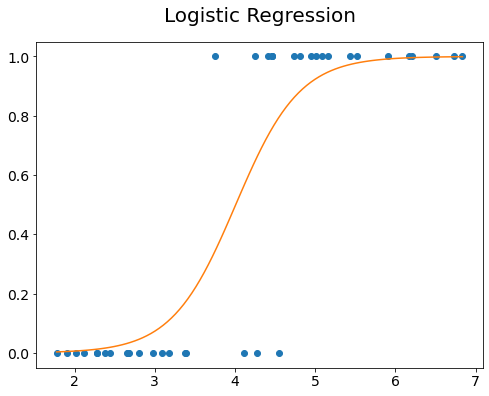

In [27]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat= 1/(1+tf.exp(-1*(W*x_fl+b))),str_title="Logistic Regression" )